In [1]:
import pandas as pd
import matplotlib.pyplot as plt


from functions import main_cleaning

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

url = "https://www.sharkattackfile.net/spreadsheets/GSAF5.xls"

df_sa = pd.read_excel(url)


In [2]:
df_sa.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Unnamed: 11,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",NaN,16h00,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",N,NaN,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,N,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,Leg bitten,N,11h30,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,N,NaN,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
valid_species = {
    'Tiger shark', 'White shark', 'Bull shark', 'Hammerhead shark', 'Great white shark', 
    'Mako shark', 'Blacktip shark', 'Reef shark', 'Nurse shark', 'Whale shark', 'Tiger shark'
}

df_sa = main_cleaning(df_sa, valid_species)


c:\Users\usr\Documents\GitHub\project-2-shark-attacks-ironhack\functions.py:143: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(value=np.nan, inplace=True)


In [4]:
df_sa.head()

,year,date,type,country,state,location,activity,name,sex,age,injury,fatal,time,species,source,pdf,href_formula,href,case_number,case_number.1
3,NaN,NaN,Unprovoked,Australia,Western Australia,NaN,NaN,Female,F,NaN,Leg Bitten,No,11:30,Tiger shark,NaN,Unknown,NaN,NaN,NaN,NaN
4,NaN,NaN,Unprovoked,NaN,NaN,NaN,Fishing,NaN,M,32.0,NaN,No,12:00,Unknown,NaN,Unknown,NaN,NaN,NaN,NaN
6,NaN,NaN,Unprovoked,Australia,NaN,NaN,Swimming,NaN,F,29.0,NaN,No,12:00,Bull shark,NaN,Unknown,NaN,NaN,NaN,NaN
7,NaN,NaN,Unprovoked,Bahamas,NaN,NaN,Swimming,Male,M,NaN,NaN,No,16:00,Unknown,NaN,Unknown,NaN,NaN,NaN,NaN
8,NaN,NaN,Unprovoked,Australia,South Australia,NaN,Surfing,NaN,M,NaN,Leg Bitten,No,13:00,White shark,NaN,Unknown,NaN,NaN,NaN,NaN


In [5]:
df_sa = df_sa[df_sa["sex"] != "Lli"]
pivot_table = df_sa.pivot_table(index=["sex", "fatal"], columns="country", aggfunc="count")
pivot_table = pivot_table.fillna(0)
pivot_table

activity                                                        \
country     Australia Bahamas Brazil  Fiji Mexico New Caledonia New Zealand   
sex fatal                                                                     
F   No           34.0    10.0    2.0   3.0    4.0           0.0         9.0   
    Unknown       0.0     0.0    0.0   0.0    0.0           0.0         0.0   
    Yes          10.0     3.0    1.0   0.0    3.0           1.0         1.0   
M   No          333.0    36.0   37.0  13.0   16.0          11.0        29.0   
    Unknown       4.0     0.0    0.0   0.0    0.0           1.0         0.0   
    Yes         106.0     2.0   15.0   3.0   12.0           6.0         9.0   

                                                               age          \
country     Papua New Guinea Reunion South Africa    Usa Australia Bahamas   
sex fatal                                                                    
F   No                   0.0     0.0          6.0  216.0      18.0     3.0   
    Unknown              0.0     0.0          0.0    1.0       0.0     0.0   
    Yes                  3.0     1.0          2.0    6.0       2.0     0.0   
M   No                  11.0    19.0        186.0  877.0     144.0    12.0   
    Unknown              0.0     0.0          0.0    3.0       3.0     0.0   
    Yes                 13.0     9.0         53.0   49.0      34.0     2.0   

                                                                           \
country     Brazil Fiji Mexico New Caledonia New Zealand Papua New Guinea   
sex fatal                                                                   
F   No         1.0  0.0    1.0           0.0         3.0              0.0   
    Unknown    0.0  0.0    0.0           0.0         0.0              0.0   
    Yes        1.0  0.0    1.0           1.0         0.0              1.0   
M   No        15.0  9.0    5.0           5.0         8.0              6.0   
    Unknown    0.0  0.0    0.0           0.0         0.0              0.0   
    Yes       10.0  2.0    8.0           3.0         3.0              2.0   

                                        case_number                      \
country     Reunion South Africa    Usa   Australia Bahamas Brazil Fiji   
sex fatal                                                                 
F   No          0.0          1.0   78.0         0.0     0.0    0.0  0.0   
    Unknown     0.0          0.0    0.0         0.0     0.0    0.0  0.0   
    Yes         2.0          0.0    2.0         0.0     0.0    0.0  0.0   
M   No          9.0         41.0  380.0         0.0     0.0    0.0  0.0   
    Unknown     0.0          0.0    1.0         0.0     0.0    0.0  0.0   
    Yes         5.0         17.0   17.0         0.0     0.0    0.0  0.0   

                                                                       \
country     Mexico New Caledonia New Zealand Papua New Guinea Reunion   
sex fatal                                                               
F   No         0.0           0.0         0.0              0.0     0.0   
    Unknown    0.0           0.0         0.0              0.0     0.0   
    Yes        0.0           0.0         0.0              0.0     0.0   
M   No         0.0           0.0         0.0              0.0     0.0   
    Unknown    0.0           0.0         0.0              0.0     0.0   
    Yes        0.0           0.0         0.0              0.0     0.0   

                              case_number.1                             \
country     South Africa  Usa     Australia Bahamas Brazil Fiji Mexico   
sex fatal                                                                
F   No               0.0  0.0           0.0     0.0    0.0  0.0    0.0   
    Unknown          0.0  0.0           0.0     0.0    0.0  0.0    0.0   
    Yes              0.0  0.0           0.0     0.0    0.0  0.0    0.0   
M   No               0.0  0.0           0.0     0.0    0.0  0.0    0.0   
    Unknown          0.0  0.0           0.0     0.0 

c:\Users\usr\Documents\GitHub\project-2-shark-attacks-ironhack\functions.py:143: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(value=np.nan, inplace=True)


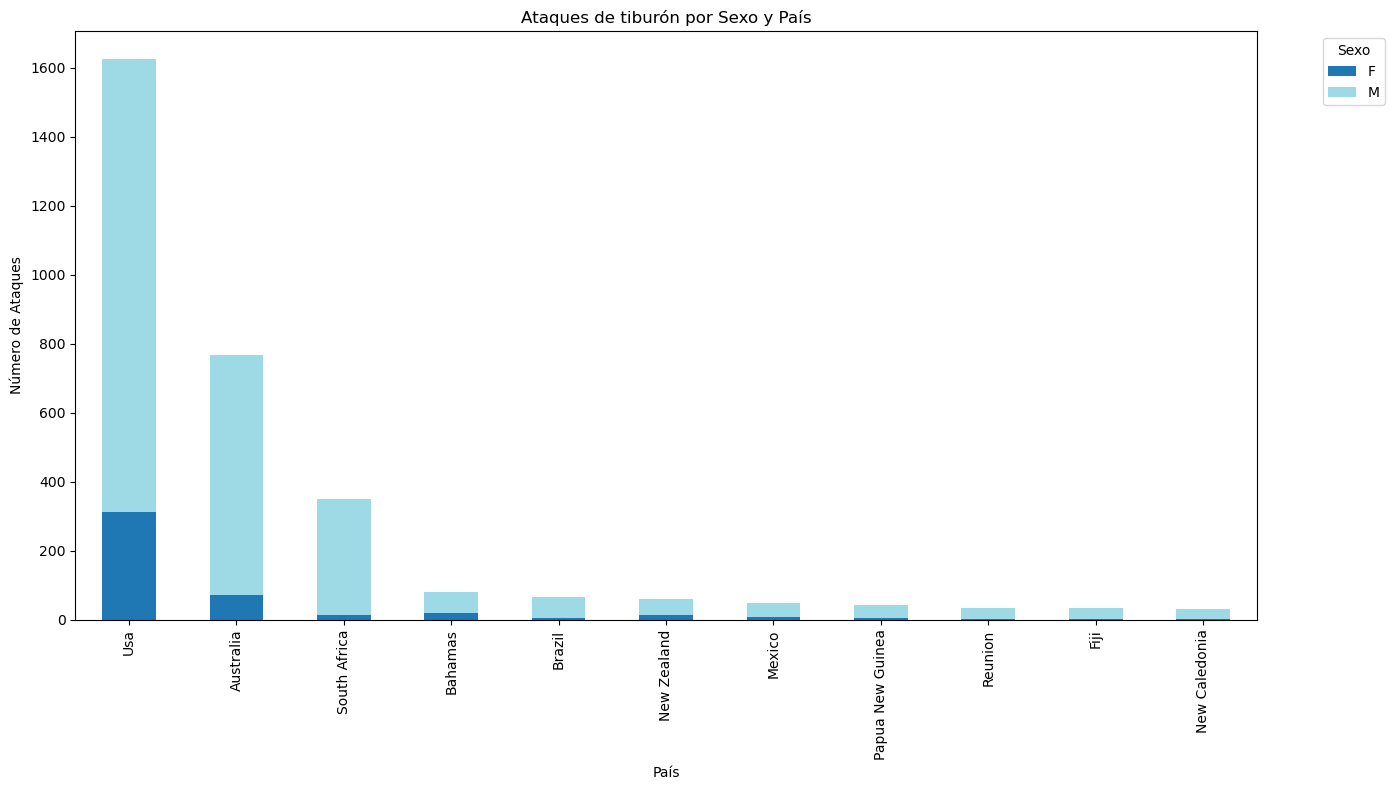

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from functions import *
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Cargar el archivo
url = "https://www.sharkattackfile.net/spreadsheets/GSAF5.xls"
df_sa = pd.read_excel(url)

# Visualizar las primeras filas
df_sa.head(5)

# Definir especies válidas
valid_species = {'Tiger shark', 'White shark', 'Bull shark', 'Hammerhead shark', 'Great white shark', 
                 'Mako shark', 'Blacktip shark', 'Reef shark', 'Nurse shark', 'Whale shark', 'Tiger shark'}

# Aplicar función de limpieza
df_sa = main_cleaning(df_sa, valid_species)

# Comprobar si las columnas necesarias existen
if not all(col in df_sa.columns for col in ['sex', 'country', 'age']):
    raise ValueError("Las columnas necesarias no están presentes en el DataFrame.")

# Agrupar los datos por país y sexo, y contar la cantidad de ocurrencias
grouped_df = df_sa.groupby(['country', 'sex']).size().unstack(fill_value=0)

# Filtrar para mostrar solo los 30 países más relevantes
top_30_countries = grouped_df.sum(axis=1).nlargest(30).index
grouped_df = grouped_df.loc[top_30_countries]

# Crear el gráfico de barras apiladas
ax = grouped_df.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

# Ajustar etiquetas y título
plt.title('Ataques de tiburón por Sexo y País')
plt.xlabel('País')
plt.ylabel('Número de Ataques')
plt.legend(title='Sexo', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()